![](https://i.ibb.co/QjQQQxG/60f414e36219b6a3b0346935457c4879.jpg)

# Восстановление золота из руды

**Необходимо** подготовить прототип модели машинного обучения для **«Цифры»**. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель **должна предсказать коэффициент восстановления золота из золотосодержащей руды**. Нам предоставлены данные с параметрами добычи и очистки. 

Модель **поможет оптимизировать** производство, **чтобы не запускать предприятие с убыточными характеристиками**.

**Этапы производства:**

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).  

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты
Описание данных

Эффективность обогащения рассчитывается по **формуле**: 

`RECOVERY = ((C x (F-T))) / (F x (C-T))) * 100 %`

где:  

- **C** — доля золота в концентрате после флотации/очистки;
- **F** — доля золота в сырье/концентрате до флотации/очистки;
- **T** — доля золота в отвальных хвостах после флотации/очистки.  

*Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат*

<footer id="footer"></footer>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек-и-данных" data-toc-modified-id="Импорт-необходимых-библиотек-и-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек и данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Проверка-выборок-и-краткий-анализ-признаков" data-toc-modified-id="Проверка-выборок-и-краткий-анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка выборок и краткий анализ признаков</a></span></li><li><span><a href="#Проверка-эффективности-обогащения-в-обучающей-выборке-на-примере-rougher.output" data-toc-modified-id="Проверка-эффективности-обогащения-в-обучающей-выборке-на-примере-rougher.output-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка эффективности обогащения в обучающей выборке на примере rougher.output</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Обработка-обучающей-выборки" data-toc-modified-id="Обработка-обучающей-выборки-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Обработка обучающей выборки</a></span></li><li><span><a href="#Обработка-тестовой-выборки" data-toc-modified-id="Обработка-тестовой-выборки-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Обработка тестовой выборки</a></span></li><li><span><a href="#Разделение-обучающей-выборки-по-процессам" data-toc-modified-id="Разделение-обучающей-выборки-по-процессам-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Разделение обучающей выборки по процессам</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-концентрации-металлов" data-toc-modified-id="Изучение-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение концентрации металлов</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-золота" data-toc-modified-id="Изменение-концентрации-золота-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Изменение концентрации золота</a></span></li><li><span><a href="#Изменение-концентрации-серебра" data-toc-modified-id="Изменение-концентрации-серебра-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Изменение концентрации серебра</a></span></li><li><span><a href="#Изменение-концентрации-свинца" data-toc-modified-id="Изменение-концентрации-свинца-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Изменение концентрации свинца</a></span></li><li><span><a href="#Размеры-гранул" data-toc-modified-id="Размеры-гранул-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Размеры гранул</a></span></li></ul></li><li><span><a href="#Суммарная-концентрация-веществ-на-разных-стадиях-производства" data-toc-modified-id="Суммарная-концентрация-веществ-на-разных-стадиях-производства-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Суммарная концентрация веществ на разных стадиях производства</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-функция-для-рассчета-метрик" data-toc-modified-id="Подготовка-функция-для-рассчета-метрик-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка функция для рассчета метрик</a></span></li><li><span><a href="#Подготовка-Pipeline" data-toc-modified-id="Подготовка-Pipeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка Pipeline</a></span></li><li><span><a href="#Обучение-моделей-с-кросс-валидацией-на-обучающей-выборке-(с-выбросами-без-нулевых-значений)" data-toc-modified-id="Обучение-моделей-с-кросс-валидацией-на-обучающей-выборке-(с-выбросами-без-нулевых-значений)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей с кросс-валидацией на обучающей выборке (с выбросами без нулевых значений)</a></span></li><li><span><a href="#Обучение-моделей-с-кросс-валидацией-на-обучающей-выборке-(с-очищенными-от-выбросов-и-нулевых-значений)" data-toc-modified-id="Обучение-моделей-с-кросс-валидацией-на-обучающей-выборке-(с-очищенными-от-выбросов-и-нулевых-значений)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение моделей с кросс-валидацией на обучающей выборке (с очищенными от выбросов и нулевых значений)</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Подготовка данных

### Импорт необходимых библиотек и данных

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


In [2]:
!gdown --id 10ip7Zzgo1y7JvrbWMVE2WcRbDE1W00he
!gdown --id 15-2wwu__x6Sx_Cy2HOO7wzjNlpaCSM4c
!gdown --id 1jWB3VIwtGvL-1MpuUJYNrmU69eU7jYBx

Downloading...
From: https://drive.google.com/uc?id=10ip7Zzgo1y7JvrbWMVE2WcRbDE1W00he
To: /content/gold_recovery_full.csv
35.4MB [00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=15-2wwu__x6Sx_Cy2HOO7wzjNlpaCSM4c
To: /content/gold_recovery_test.csv
5.77MB [00:00, 143MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jWB3VIwtGvL-1MpuUJYNrmU69eU7jYBx
To: /content/gold_recovery_train.csv
26.2MB [00:00, 159MB/s] 


In [3]:
df = pd.read_csv('/content/gold_recovery_full.csv')
train = pd.read_csv('/content/gold_recovery_train.csv')
test = pd.read_csv('/content/gold_recovery_test.csv')

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Описание данных 

Для начала посмотрим общий сет данных, изучим наши признаки. Выработаем стратегию работы с обучающей и тестовой выборкой, чтобы не допустить смещения из-за информационного просмотра данных (data snooping)

In [4]:
df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Имеем следующие признаки и метки



**Технологический процесс**

- `Rougher feed` — исходное сырье
- `Rougher additions (или reagent additions)` — флотационные реагенты: Xanthate, Sulphate, Depressant  
  
  -- `Xanthat` — ксантогенат (промотер, или активатор флотации);   
  -- `Sulphate` — сульфат (на данном производстве сульфид натрия);  
  -- `Depressant` — депрессант (силикат натрия).  
   
   
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

  
**Параметры этапов**

- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи


**Наименование признаков**


Наименование признаков должно быть:  

**[этап].[тип_параметра].[название_параметра]**

**Пример**: rougher.input.feed_ag


Возможные значения для блока **[этап]**: 

- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики  

Возможные значения для блока [тип_параметра]: 

- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики


Можно выделить два признака целевых:  


эффективность обогащения чернового концентрата `rougher.output.recovery`;  
эффективность обогащения финального концентрата `final.output.recovery`.

![](https://i.ibb.co/dM09JVc/viruchka-1576238830.jpg)

Исходя из данной схемы, нам необходимо будет разделить обучающую выборку на два компонента - это флотации и два этапа очистки

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Проверка выборок и краткий анализ признаков

Проверим, правильно ли разделены выборки на тестовую и обучающую

In [5]:
def print_info(data, x, x_val):
    return print(' Количество образцов обучающей выборки:', len(x),'\n',
                 'Количество образцов тестовой выборки:', len(x_val),'\n',
                 'Сумма выборок:', len(x) + len(x_val),'\n',
                 'Количество образцов подготовленной выборки (контрольная сумма):', len(data))

In [6]:
print_info(df, train, test)

 Количество образцов обучающей выборки: 16860 
 Количество образцов тестовой выборки: 5856 
 Сумма выборок: 22716 
 Количество образцов подготовленной выборки (контрольная сумма): 22716


In [7]:
print('Доля тестовой выборки:{:.2%}'.format((len(test)/len(df))))

Доля тестовой выборки:25.78%


In [8]:
print('Доля тренировочной выборки:{:.2%}'.format((len(train)/len(df))))

Доля тренировочной выборки:74.22%


Приемлемо, минимум мы требуем минимум 20% от обучающей выборки. 24,78% нас устраивает
Посмотрим, как выглядят данные в признаках

In [9]:
pd.set_option("display.max_columns", 9)
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,...,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,...,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,...,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,...,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,...,7.894242,-500.356035,13.996647,-601.496691


In [10]:
pd.reset_option("max_columns")

Проверим размеры тестовой выборки и обучающей

In [11]:
train.shape, test.shape

((16860, 87), (5856, 53))

Тестовая выборка содержит меньше признаков, посмотрим какие отсутствуют

In [12]:
print('Количество признаков, отсутствующих в тестовой выборке:' , len(set(train) - set(test)))
set(train.columns) - set(test.columns)

Количество признаков, отсутствующих в тестовой выборке: 34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что отсутствуют признаки из блоков `output` - `параметры продуктов`, `calculation` - `расчётные характеристики`
Также отсутствуют целевые признаки, которых можно выделить два: 

`rougher.output.recovery` — эффективность обогащения чернового концентрата  
`final.output.recovery` — эффективность обогащения финального концентрата

Можно предположить, что данные признаки рассчитываются на выходе продукции и доступны после этапа производства. При формировании признаков для модели учтем данный факт  


Приведем `train` к `test` выборке

Посмотрим период, за который доступны наши данные:

In [13]:
print('Данные доступны за период от', pd.to_datetime(df['date'].min()), 'до', pd.to_datetime(df['date'].max()))

Данные доступны за период от 2016-01-15 00:00:00 до 2018-08-18 10:59:59


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Проверка эффективности обогащения в обучающей выборке на примере rougher.output

Проверим, правильно ли эффективность обогащения рассчитана в обучающей выборке. Рассчитаем ее на `train` и найдем MAE

In [14]:
def recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    
    recovery = (((C * (F-T))) / (F * (C-T)))*100
    return recovery

In [15]:
train_rec = train [['rougher.output.concentrate_au', 
                    'rougher.input.feed_au', 
                    'rougher.output.tail_au',
                    'rougher.output.recovery']].copy()
train_rec = train_rec.dropna(axis=0)
train_rec['test_recovery'] = train_rec.apply(recovery, axis=1)
train_rec.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,test_recovery
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


In [16]:
MAE = mean_absolute_error(train_rec['rougher.output.recovery'], train_rec['test_recovery'])
print('Средняя абсолютная ошибка: {:.17f}'.format(MAE))

Средняя абсолютная ошибка: 0.00000000000000944


Ошибка стремится к нулю - принимаем, что значения рассчитаны верно

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Предобработка

#### Обработка обучающей выборки

Посмотрим общую информацию о сете в работе. Как мы видели ранее - необходимо будет его разделить на две обучающих выборки - одна для флотации и другая для этапов очистки, так как мы имеем две целевых переменных

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,16788.0,4.716907,2.096718,0.000000,3.971262,4.869346,5.821176,16.001945
final.output.concentrate_pb,16788.0,9.113559,3.389495,0.000000,8.825748,10.065316,11.054809,17.031899
final.output.concentrate_sol,16490.0,8.301123,3.825760,0.000000,6.939185,8.557228,10.289741,18.124851
final.output.concentrate_au,16789.0,39.467217,13.917227,0.000000,42.055722,44.498874,45.976222,53.611374
final.output.recovery,15339.0,67.213166,11.960446,0.000000,62.625685,67.644601,72.824595,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,16775.0,-500.230146,76.983542,-799.741097,-500.530594,-499.784231,-496.531781,-275.073125
secondary_cleaner.state.floatbank5_b_air,16775.0,12.377241,6.219989,0.427084,8.925586,11.092839,15.979467,39.846228
secondary_cleaner.state.floatbank5_b_level,16776.0,-498.956257,82.146207,-800.258209,-500.147603,-499.933330,-498.418000,-120.190931
secondary_cleaner.state.floatbank6_a_air,16757.0,18.429208,6.958294,0.024270,13.977626,18.034960,24.984992,54.876806


Посмотрим пропуски

In [19]:
train.isna().mean().sort_values(ascending=False)

rougher.output.recovery                               0.152610
rougher.output.tail_ag                                0.133452
rougher.output.tail_sol                               0.133393
rougher.output.tail_au                                0.133393
secondary_cleaner.output.tail_sol                     0.117794
                                                        ...   
rougher.calculation.sulfate_to_au_concentrate         0.001601
rougher.calculation.floatbank10_sulfate_to_au_feed    0.001601
rougher.calculation.floatbank11_sulfate_to_au_feed    0.001601
primary_cleaner.input.feed_size                       0.000000
date                                                  0.000000
Length: 87, dtype: float64

Нас больше интересуют пропуски по целевому признаку - они помешают оценке, решим, как поступить с ними на этапе подготовки признаков для модели, создадим некоторый конвейер для обработки.   

Остальные признаки можно заменить методом `ffill`, так как нам известно, что значения близкие по дате будут равны. В данном случае, считаем, что это самая верная стратегия борьбы с пропусками, при этом пропуски в целевых значениях будут удалены вместе со строками, чтобы не мешать нашей модели

In [20]:
train[['rougher.output.recovery', 'final.output.recovery']].isna().mean().sort_values(ascending=False)

rougher.output.recovery    0.152610
final.output.recovery      0.090214
dtype: float64

Эти строки будут удалены перед обучением, чтобы не искажать результаты. Проверим дубликаты

In [21]:
train.duplicated().sum()

0

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Обработка тестовой выборки

Тестовую выборку осмотрим бегло, чтобы не было искажений, всю обработку будем производить перед обучениям модели, чтобы выстроить конвейер работы с признаками, так как модель будет передана заказчику.

In [22]:
test.isna().mean().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.060280
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
rougher.input.floatbank10_sulfate             0.043887
primary_cleaner.input.xanthate                0.028347
rougher.input.floatbank10_xanthate            0.021004
rougher.input.feed_sol                        0.011441
rougher.input.floatbank11_sulfate             0.009392
rougher.input.feed_rate                       0.006831
secondary_cleaner.state.floatbank3_a_air      0.005806
secondary_cleaner.state.floatbank2_b_air      0.003928
rougher.input.feed_size                       0.003757
secondary_cleaner.state.floatbank2_a_air      0.003415
rougher.state.floatbank10_e_air               0.002903
rougher.state.floatbank10_d_air               0.002903
rougher.state.floatbank10_a_air               0.002903
rougher.state.floatbank10_b_air               0.002903
rougher.state.floatbank10_c_air               0.002903
rougher.st

Пропуски не значительные. Думаем заменять с помощью интерполяции

In [23]:
test.duplicated().sum()

0

#### Разделение обучающей выборки по процессам

Приведем признаки `train` к `test`, выделим сет процесса `rougher`

In [24]:
X_train = train[test.columns]

rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols]
X_test_rougher = test.loc[:, rougher_cols]
y_train_rougher = train[['rougher.output.recovery']]
X_train_rougher.columns

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],
      dtype='object')

In [25]:
X_train_rougher.shape, y_train_rougher.shape, X_test_rougher.shape

((16860, 22), (16860, 1), (5856, 22))

Аналогично сделаем для этапа `final`, состоящий из двух этапов очистки `cleaner`

In [26]:
final_cols = X_train.columns.str.contains('cleaner')
X_train_final = X_train.loc[:, final_cols]
X_test_final = test.loc[:, final_cols]
y_train_final = train[['final.output.recovery']]
X_train_final.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.

In [27]:
X_train_final.shape, y_train_final.shape, X_test_final.shape

((16860, 30), (16860, 1), (5856, 30))

Таким образом мы имеем две выборки для обучения - одна для флотации и другая для очистки

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Вывод

В работу нам предоставлены три сета данных:  

 - общий data 
 - обучающий train 
 - тестовый test 
 
Данные индексируются датой и временем получения информации (признак date).  

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками. Восстанавливать пропущенные признаки не стали, обучать будем на тренировочном сете с учетом столбцов теста


Данные достаточно сырые - есть пропуски.  

Пропуски по целевым параметрам будут удалены, пропуски по параметрам - восстановлены методом `ffill`. Удаление будет производиться через pipeline модели, так как нам необходимо передать ее заказчику  

Обучающую выборку разделили на две - для этапа флотации и для этапа обработки концентрат. Аналогично поступили с тестовой выборкой

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Анализ данных

### Изучение концентрации металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [28]:
elements = {'золото': 'au', 'серебро': 'ag', 'свинец': 'pb'}

In [29]:
def fraction(elem):
    
    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    fig_dims = (15, 10)
    fig1, ax1 = plt.subplots(figsize=fig_dims) 
    for col in cols:
                
        sns.kdeplot(train[col], shade=True, alpha=.42, ax=ax1)
        plt.title('Концентрация металла ' + str(elem).title() + ' на различных этапах очистки', fontsize=15)

def boxplot(elem):

    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    plt.figure(figsize=(15,10))
    sns.boxplot(data=df[cols], linewidth=0.42, palette="Set2")
    plt.title('Концентрация металла ' + str(elem).title() + ' на различных этапах очистки', fontsize=15)

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Изменение концентрации золота

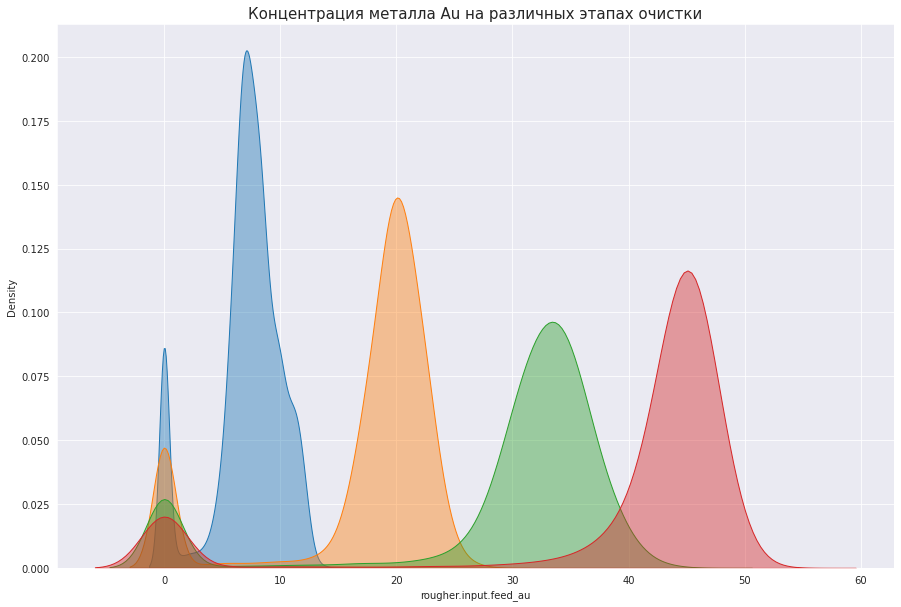

In [30]:
fraction(elements['золото'])

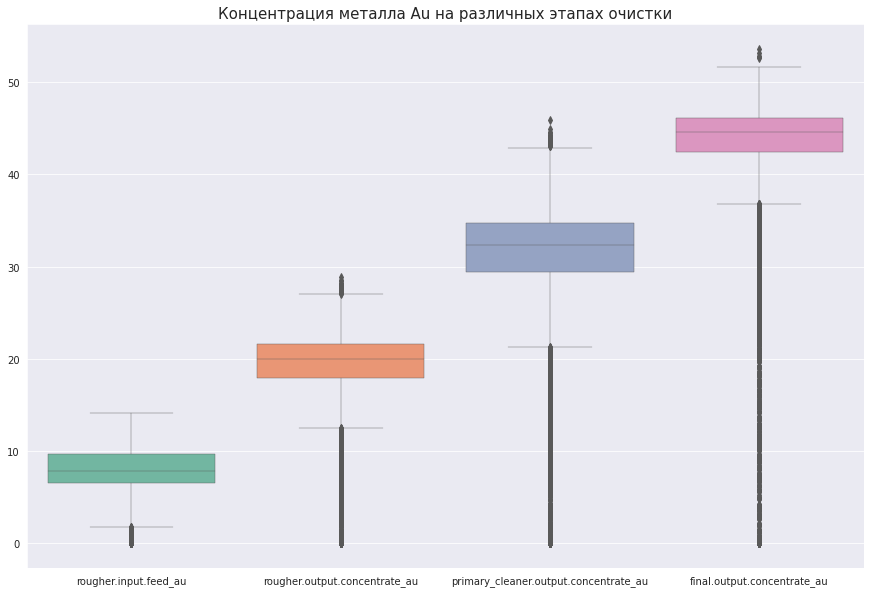

In [31]:
boxplot(elements['золото'])

Мы видим, что концентрация содержания золота повышается по мере очистки и достигиает своих максимальных значений в конце технологического процесса, что является достаточно логичным. Стоит отметит наличие выбросов и наличие нулевых значений. 

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Изменение концентрации серебра

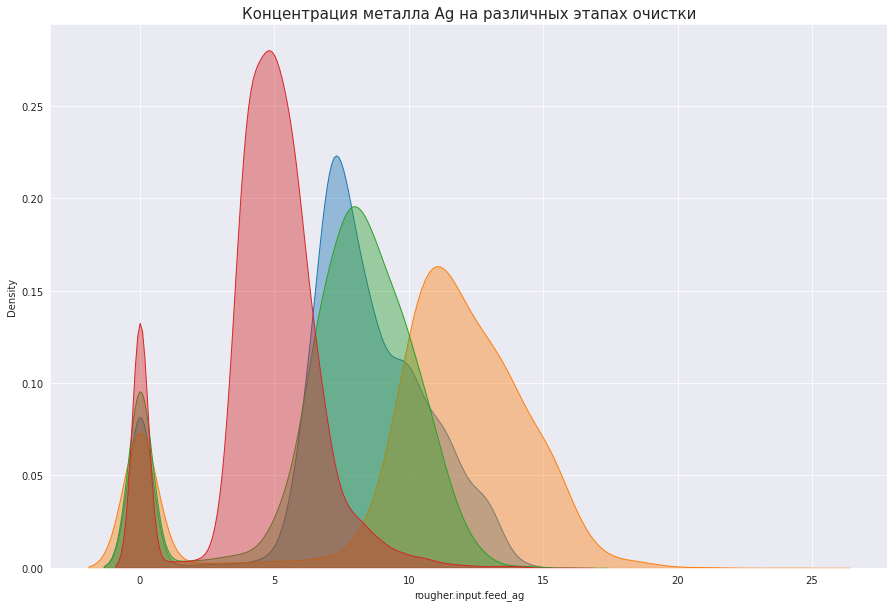

In [32]:
fraction(elements['серебро'])

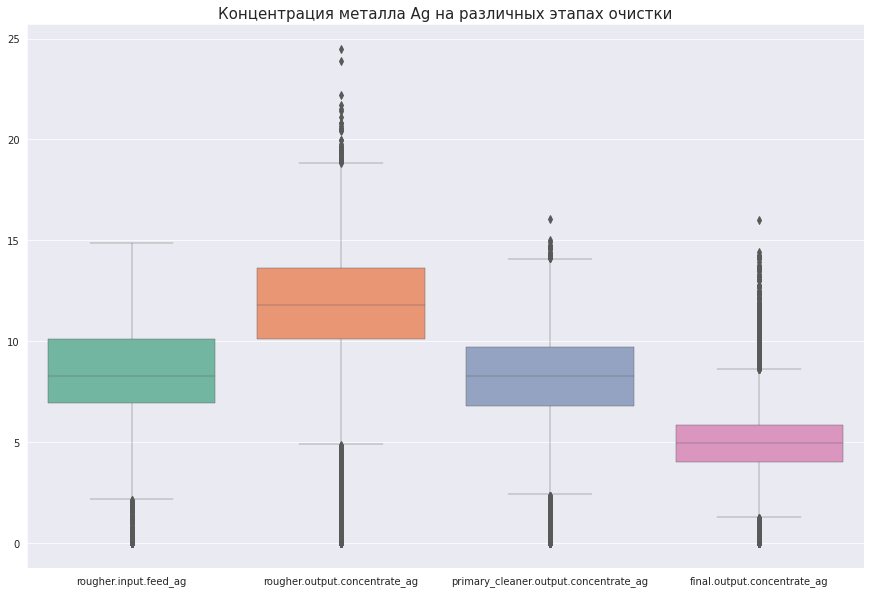

In [33]:
boxplot(elements['серебро'])

Мы видим, что концентрация содержания серебра повышается по завершению этапа флотации и по мере очистики начианет снижаться 

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Изменение концентрации свинца

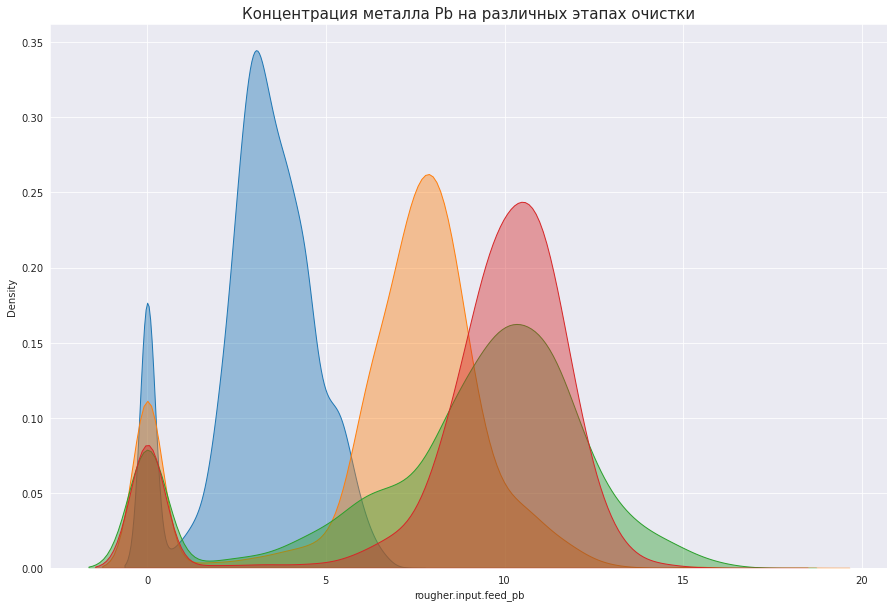

In [34]:
fraction(elements['свинец'])

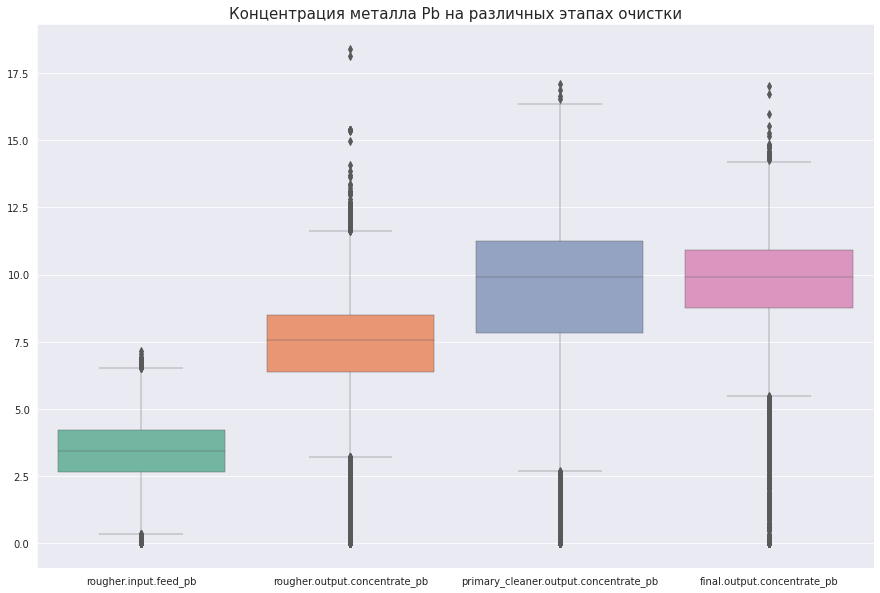

In [35]:
boxplot(elements['свинец'])

Мы видим, что содержание свинца начинает подниматься по завершению эатапа флотации и сохраняется либо незначительно увеличивается на этапах очистки. В сульфидных рудах свинец в основном присутствует в форме галенита, обладающего значительной плотностью зерен (7,4–7,6) и высокой флотационной активностью. Это определяет возможность эффективного извлечения свинца (вместе с ассоциированными с ним золото- и серебросодержащими минералами) из руд методами гравитационно-флотационного обогащения. Возможно остаточный свинец свидетельствует о необходимости замены реагентов

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Размеры гранул

Посмотрим размеры гранул сырья этапа rougher

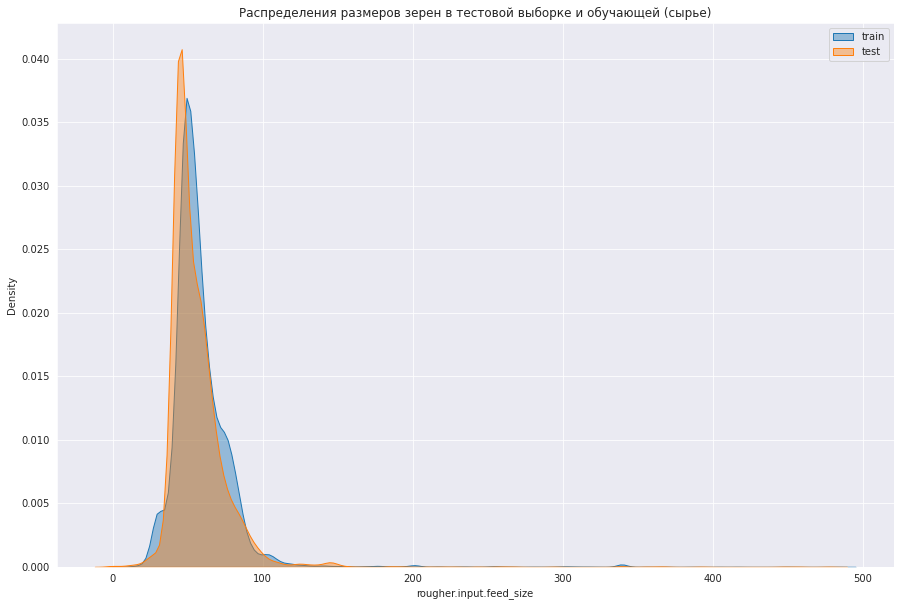

In [36]:
plt.figure(figsize=(15,10))
sns.kdeplot(train['rougher.input.feed_size'].dropna(), label='train', shade=True, alpha=.42)
sns.kdeplot(test['rougher.input.feed_size'].dropna(), label='test', shade=True, alpha=.42)
plt.title('Распределения размеров зерен в тестовой выборке и обучающей (сырье)')
plt.legend()
plt.show()

Проведем тест Левена и рассмотрим различатся ли дисперсии наших выборок по признаку `rougher.input.feed_size`



In [37]:
sample_1 = train['rougher.input.feed_size'].dropna()
sample_2 = test['rougher.input.feed_size'].dropna()

alpha = .05
stat, p = st.levene(sample_1, sample_2)
result_levene = p

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются')
else:
    print("Не отвергаем Н0, дисперсии не различаются")

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Дисперсии по выборкам: ', var_sample)

Не отвергаем Н0, дисперсии не различаются
Дисперсии по выборкам:  [572.2903491016468, 516.3917105196837]


Распределения схожи. Незначительные есть, но обучению не должно помешать. Дисперсии по выборкам не отличаются  

Посмотрим как распределны значения размера зерен при первичной обработке

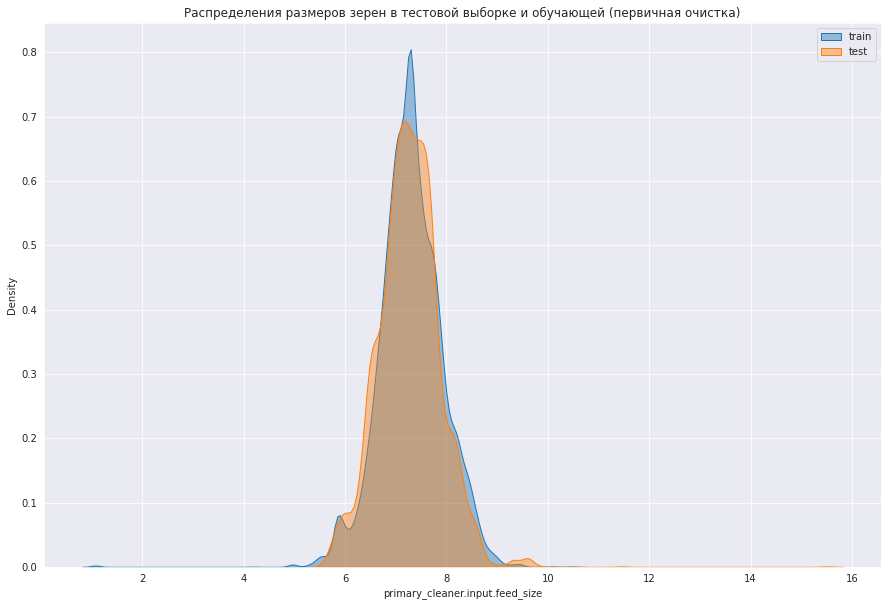

In [38]:
plt.figure(figsize=(15,10))
sns.kdeplot(train['primary_cleaner.input.feed_size'].dropna(), label='train', shade=True, alpha=.42)
sns.kdeplot(test['primary_cleaner.input.feed_size'].dropna(), label='test', shade=True, alpha=.42)
plt.title('Распределения размеров зерен в тестовой выборке и обучающей (первичная очистка)')
plt.legend()
plt.show()

In [39]:
sample_3 = train['primary_cleaner.input.feed_size'].dropna()
sample_4 = test['primary_cleaner.input.feed_size'].dropna()

alpha = .05
stat, p = st.levene(sample_3, sample_4)
result_levene = p

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются')
else:
    print("Не отвергаем Н0, дисперсии не различаются")

var_sample = [np.var(x, ddof=1) for x in [sample_3, sample_4]]
print('Дисперсии по выборкам: ', var_sample)

Не отвергаем Н0, дисперсии не различаются
Дисперсии по выборкам:  [0.383366239405203, 0.37396377933413605]


Распределения схожи. Дисперсии по выборкам не отличаются

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Суммарная концентрация веществ на разных стадиях производства

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом, после очистки и финальном концентратах. Для этого выделим необходимые столбцы из нашего объединенного сета

In [40]:
crude = 'rougher.input.feed_'
crude_out = 'rougher.output.concentrate_'
prim_clean = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'

df['сырье'] = df[[crude+'au', crude+'ag', crude+'pb']].sum(axis=1)
df['черновой концентрат'] = df[[crude_out+'au', crude_out+'ag', crude_out+'pb']].sum(axis=1)
df['концентрат после очистки'] = df[[prim_clean+'au', prim_clean+'ag', prim_clean+'pb']].sum(axis=1)
df['финальный концентрат'] = df[[final+'au', final+'ag', final+'pb']].sum(axis=1)

In [41]:
df[['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']].head()

,сырье,черновой концентрат,концентрат после очистки,финальный концентрат
0,14.871440,38.395653,53.111627,58.137072
1,14.905729,38.945647,53.174338,58.699942
2,14.638299,38.649756,52.927464,58.927421
3,14.199305,38.411473,43.979185,58.714815
4,13.511497,38.867359,52.121146,59.065251


In [42]:
df[['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']].describe().T

,count,mean,std,min,25%,50%,75%,max
сырье,22716.0,18.833952,7.418530,0.0,16.447446,19.560398,23.572584,35.071987
черновой концентрат,22716.0,35.500849,13.401008,0.0,37.326591,39.961497,42.181417,55.568687
концентрат после очистки,22716.0,45.489901,16.248774,0.0,48.745632,51.517962,53.156499,60.269003
финальный концентрат,22716.0,53.673032,17.975586,0.0,58.684224,60.073814,60.990543,65.575259


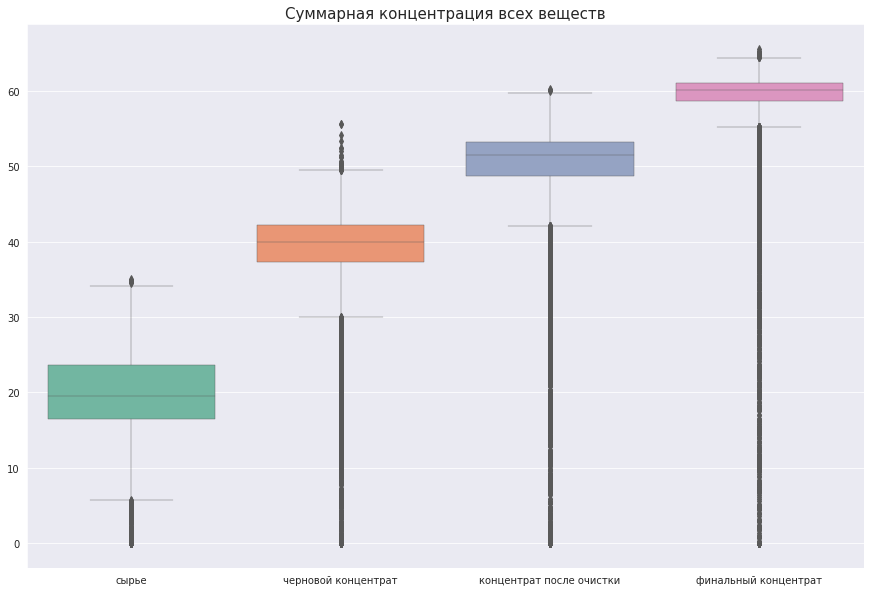

In [43]:
col_1 = ['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']

plt.figure(figsize=(15,10))
sns.boxplot(data=df[col_1], linewidth=0.42, palette="Set2")
plt.title('Суммарная концентрация всех веществ', fontsize=15)
plt.show()

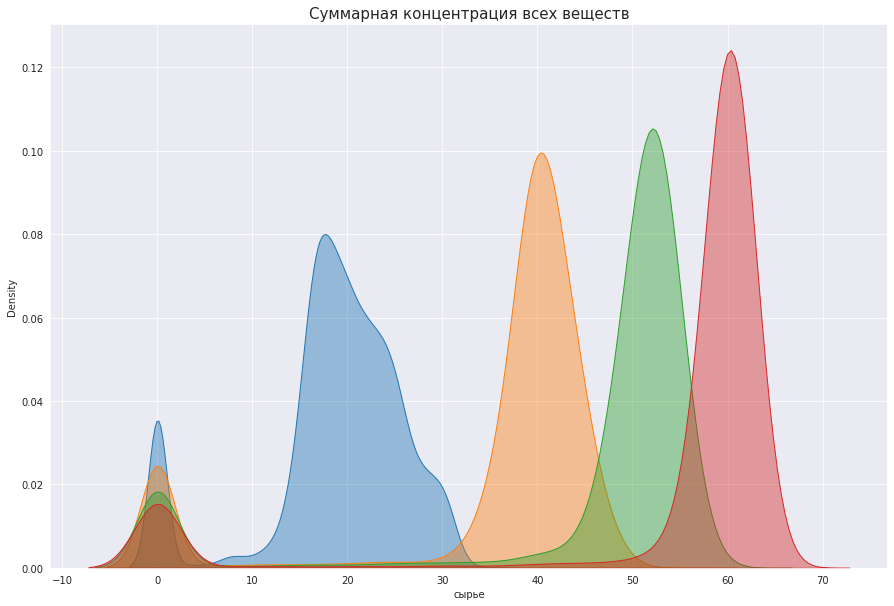

In [44]:
col_1 = ['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']

fig_dims = (15, 10)
fig1, ax1 = plt.subplots(figsize=fig_dims) 
for col in col_1:
                
    sns.kdeplot(df[col], shade=True, alpha=.42, ax=ax1)
    plt.title('Суммарная концентрация всех веществ', fontsize=15)


Обнаружены выбросы и нулевые значения концентрация, которые можно принять как аномалии. Такие значения необходимо будет удалять перед обучением  

Попробуем избавиться от выбросов и создать второй набор данных для обучения. Посмотрим на результаты обучения на обоих сетах - с выбросами и без

In [45]:
df.shape

(22716, 91)

In [46]:
crude = 'rougher.input.feed_'
crude_out = 'rougher.output.concentrate_'
prim_clean = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'

cols_clean = [crude+'au', crude+'ag', crude+'pb', 
             crude_out+'au', crude_out+'ag', crude_out+'pb',
             prim_clean+'au', prim_clean+'ag', prim_clean+'pb',
             final+'au', final+'ag', final+'pb']
for col in cols_clean:
    q25, q75 = df[col].quantile(q=0.25), df[col].quantile(q=0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    outliers_removed = [x for x in df[col] if x > lower and x < upper]

print('Найдены выбросы: %d' % len(outliers))

Найдены выбросы: 2340


Попробуем максимально убрать значения за пределами усов

In [47]:
low = .20
high = .95
quant_df = df[cols_clean].quantile([low, high])
df_clean = df[cols_clean].apply(lambda x: x[(x > quant_df.loc[low, x.name]) & 
                                     (x < quant_df.loc[high, x.name])], axis=0)
df_clean.dropna(inplace=True)
df_clean.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
43,6.845632,6.988699,2.552393,19.161033,12.046412,7.158107,36.080017,8.830847,9.610998,45.358076,5.110753,10.726356
54,7.275418,7.634960,3.084302,18.861112,11.116853,7.855568,34.413681,9.492328,10.462952,43.561270,5.311343,11.675848
55,7.275729,7.383200,2.806724,19.326225,10.795206,7.549066,36.076596,8.777859,10.486529,44.180403,4.936983,11.510876
57,7.094447,7.435331,2.565581,19.107428,11.304290,7.130568,37.821583,8.321753,9.737570,46.924587,4.498173,10.570763
58,7.079100,7.442908,2.568697,18.592221,11.177676,6.951267,36.440323,9.029780,9.442908,45.410690,4.841728,10.625456


In [48]:
df_clean.shape

(6038, 12)

In [49]:
df_clean['сырье'] = df_clean[[crude+'au', crude+'ag', crude+'pb']].sum(axis=1)
df_clean['черновой концентрат'] = df_clean[[crude_out+'au', crude_out+'ag', crude_out+'pb']].sum(axis=1)
df_clean['концентрат после очистки'] = df_clean[[prim_clean+'au', prim_clean+'ag', prim_clean+'pb']].sum(axis=1)
df_clean['финальный концентрат'] = df_clean[[final+'au', final+'ag', final+'pb']].sum(axis=1)

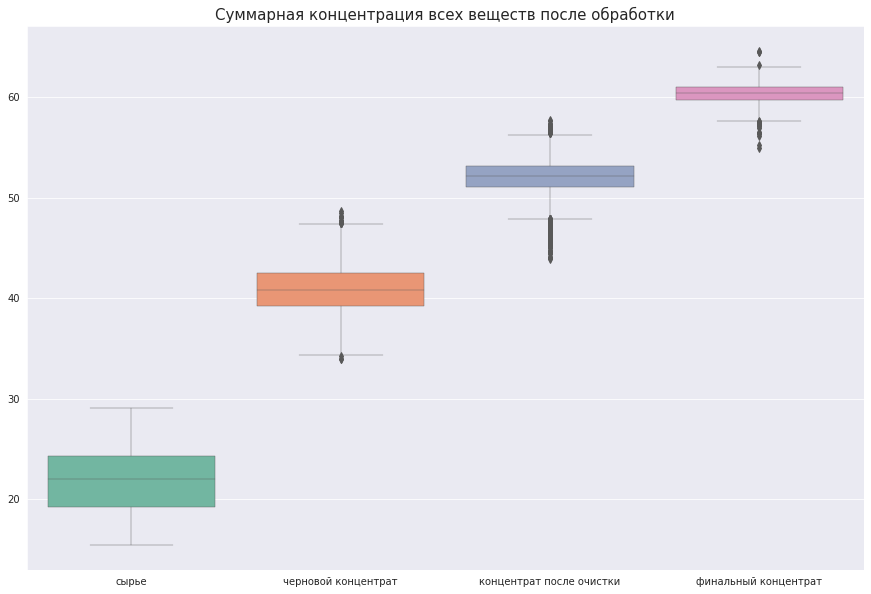

In [50]:
col_1 = ['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат']

plt.figure(figsize=(15,10))
sns.boxplot(data=df_clean[col_1], linewidth=0.42, palette="Set2")
plt.title('Суммарная концентрация всех веществ после обработки', fontsize=15)
plt.show()

Создадим второй сет выборок - очищенные от выбросов, попробуем также сделать предсказания по нему

In [51]:
X_train_rougher_clean = X_train_rougher[X_train_rougher.index.isin(df_clean.index)]
X_test_rougher_clean = X_test_rougher[X_test_rougher.index.isin(df_clean.index)]
y_train_rougher_clean = train[['rougher.output.recovery']][train.index.isin(df_clean.index)]
X_train_rougher_clean.shape, X_test_rougher_clean.shape, y_train_rougher_clean.shape

((4906, 22), (1103, 22), (4906, 1))

In [52]:
X_train_final_clean = X_train_final[X_train_final.index.isin(df_clean.index)]
X_test_final_clean = X_test_final[X_test_final.index.isin(df_clean.index)]
y_train_final_clean = train[['final.output.recovery']][train.index.isin(df_clean.index)]
X_train_final_clean.shape, X_test_final_clean.shape, y_train_final_clean.shape

((4906, 30), (1103, 30), (4906, 1))

Предлагаем убирать нулевые значения - объекты со значением 0 - под удаление, они не несут полезной нагрузки, при этом исказят предсказания модели. Добавить в pipeline удаление нулевых значений

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Вывод

Проанализировали концентрации металлов на различных стадиях производства:  

- **золото**:  
  повышается по мере очистки и достигиает своих максимальных значений в конце технологического процесса 
- **серебро**:  
  повышается по завершению этапа флотации и по мере очистики начианет снижаться  
- **свинец**:  
  содержание свинца начинает подниматься по завершению эатапа флотации и сохраняется либо незначительно увеличивается на этапах очистки  
  
Проверили распределяни значений размеров гранул как на этапе подготовки сырья, так и на этапе очистки - распредления схожи, дисперсии не различаются, нет необходимости в корректировке
  
**Были обнаружены нулевые значения сумм металлов - такие необходимо будет удалить перед подготовкой модели**

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Модель

### Подготовка функция для рассчета метрик

Для решения задачи введём новую метрику качества — `sMAPE` (англ. `Symmetric Mean Absolute Percentage Error`, «симметричное среднее абсолютное процентное отклонение»).  
Она похожа на `MAE`, но выражается не в абсолютных величинах, а в относительных  

![](https://i.ibb.co/cwgLFyC/smape-1576239058.jpg)

In [53]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        total += abs(y_true[i] - y_pred[i]) / ((abs(y_true[i]) + abs(y_pred[i]))/2)
        smape = abs(total*100 / len(y_true))
    return abs(smape)

In [54]:
scorer = make_scorer(smape, greater_is_better=False)

Итоговая метрика складывается из двух величин:  

![](https://i.ibb.co/qDTrrNM/smape-1576238814.jpg)

In [55]:
def smape_final(smape_rougher, smape_final):
    smape_final = (0.25 * smape_rougher + 0.75 * smape_final)
    return smape_final

Функции подготовлены, можем приступать к подготовке `Pipeline` модели и полуению предсказаний

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Подготовка Pipeline

В результате проведенного EDA и статистического анализа данных, были выявлены следующие проблемы:  

- нулевые значений целевых признаков
- `nan` пропуски в признаках
- `nan` пропуски в целевых признаках
- необходимо провести стандартизацию данных  
- обучить модель на двух сетах - с выбросами и без выбросов


Учтем данные замечания при построении модели и подготовки `Pipeline`. Для начала разберемся с пропусками

напишем две функции, которые необходимо будет применять перед обучением модели для автоматизации процесса

1. Функция на основе метода ffill
2. Функция для удаления срок с целеыми значениями, равными 0

In [56]:
def ffill_y (target):
    target = target.ffill()
    return target

def drop_zeros(X_train, y_train):
    y_train = y_train[(y_train != 0).all(1)]  
    X_train = X_train.loc[y_train.index, :]
    return X_train, y_train


В пункте 1.5.3 мы разделили наши выборки на две составляющих - для этапа флотации и этапа очистки:  

- `X_train_rougher`, `X_test_rougher`, `y_train_rougher`
- `X_train_final`, `X_test_final`, `y_train_final`  

Применим наши функции

In [57]:
y_train_rougher_1 = ffill_y(y_train_rougher)
y_train_final_1 =  ffill_y(y_train_final)

X_train_rougher_pred, y_train_rougher_pred = drop_zeros(X_train_rougher, y_train_rougher_1)
X_train_final_pred, y_train_final_pred = drop_zeros(X_train_final, y_train_final_1)

In [58]:
y_train_rougher_pred.isna().mean()

rougher.output.recovery    0.0
dtype: float64

In [59]:
y_train_final_pred.isna().mean()

final.output.recovery    0.0
dtype: float64

In [60]:
X_train_rougher_pred.shape, y_train_rougher.shape

((16284, 22), (16860, 1))

Приступим к написанию Pipline наших моделей

In [61]:
num_pipeline_rougher = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline_final = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [62]:
X_train_rougher_prep = num_pipeline_rougher.fit_transform(X_train_rougher_pred)
X_train_final_prep = num_pipeline_final.fit_transform(X_train_final_pred)

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Обучение моделей с кросс-валидацией на обучающей выборке (с выбросами без нулевых значений)

In [63]:
models = [RandomForestRegressor(random_state=42), LinearRegression(), Lasso(alpha=0.1), Ridge()]

In [64]:
%%time
results_cross_val = []
for model in models: 
            
    cross_val_score_rougher = cross_val_score(model, 
                                              X_train_rougher_prep, 
                                              y_train_rougher_pred, 
                                              cv=5, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            X_train_final_prep, 
                                            y_train_final_pred, 
                                            cv=5, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
result = pd.DataFrame(results_cross_val)

CPU times: user 6min 14s, sys: 3.55 s, total: 6min 17s
Wall time: 6min 13s


In [65]:
result

,model name,cross_val_score_rougher,cross_val_score_final
0,RandomForestRegressor,-9.082294,-13.257123
1,LinearRegression,-9.380047,-12.360025
2,Lasso,-9.151560,-11.958212
3,Ridge,-9.378545,-12.356513


Лучший результат у модели Lasso, попробуем немного улучшить параметры

In [66]:
%%time
param_grid = [{'fit_intercept': [True, False]}]

lasso_reg = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search.fit(X_train_rougher_prep, y_train_rougher_pred)

CPU times: user 4.06 s, sys: 2.28 s, total: 6.35 s
Wall time: 3.81 s


In [67]:
final_model = grid_search.best_estimator_

X_test_rougher_pred = num_pipeline_rougher.transform(X_test_rougher)
y_test = ffill_y(df.loc[X_test_rougher.index, 'rougher.output.recovery'])

final_predictions = final_model.predict(X_test_rougher_pred)
rougher = smape(final_predictions, y_test)


In [68]:
%%time
param_grid_final = [{'fit_intercept': [True, False]}]

lasso_reg_final = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search_final = GridSearchCV(lasso_reg_final, param_grid_final, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search_final.fit(X_train_final_prep, y_train_final_pred)

CPU times: user 4.74 s, sys: 2.27 s, total: 7.01 s
Wall time: 4.15 s


In [69]:
final_model_fin = grid_search_final.best_estimator_
X_test_final_pred = num_pipeline_final.transform(X_test_final)
y_test_fin = ffill_y(df.loc[X_test_final.index, 'final.output.recovery'])

final_predictions_final = final_model_fin.predict(X_test_final_pred)
final = smape(final_predictions_final, y_test_fin)


In [70]:
print('sMAPE модели = {:.2f}'.format(smape_final (rougher, final))) 

sMAPE модели = 13.49


Построим константную модель и проверим нашу оценку

In [71]:
predicted_valid_rog = pd.Series(y_train_rougher_pred['rougher.output.recovery'].mean(), index=y_test.index)
rog = smape(y_test, predicted_valid_rog)

predicted_valid_fin = pd.Series(y_train_final_pred['final.output.recovery'].mean(), index=y_test_fin.index)
fin = smape(y_test_fin, predicted_valid_fin)

print('sMAPE константной модели = {:.2f}'.format(smape_final (rog, fin)))

sMAPE константной модели = 13.49


Финальная метрика sMAPE на модели оказалась близкой к константной модели. Необходимо проверить разбросы средних по выборкам. Для начала оценим наши выборки. Это позволит нам выяснить какой параметр equal_var нам применять в тест Стьюдента. Проведем тест Левена и рассмотрим различатся ли дисперсии наших выборок. Для этапа `rougher`

In [72]:
pred_mean = pd.Series(final_predictions)
const_mean = y_train_rougher_pred['rougher.output.recovery']

alpha = .05
stat, p = st.levene(pred_mean, const_mean)
result_levene = p


if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются, equal_var=False для ttest')
else:
    print("Не отвергаем Н0, дисперсии не различаются, equal_var=True для ttest")

var_sample = [np.var(x, ddof=1) for x in [pred_mean, const_mean]]
print('Дисперсии по выборкам: ', var_sample)

Отвергаем Н0, дисперсии различаются, equal_var=False для ttest
Дисперсии по выборкам:  [9.175597631632882e-23, 122.36374422223983]


Построим гипотезы:
 Сформулируем ее как Гипотезу о равенстве средних двух генеральных совокупностей
 - **H0 (нулевая гипотеза)**: средние предсказания **равны** среднему константной модели.
   
 - **H1 (альтернативная гипотеза)**:  средние предсказания **не равны** среднему константной модели.

In [73]:
alpha = .05 
results = st.ttest_ind(pred_mean, const_mean, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")


p-значение: 0.9999999999997384
Не отвергаем Н0


In [74]:
pred_mean.mean(), const_mean.mean()

(83.16912567021404, 83.16912567020388)

Действительно, по этапу `rougher` средние не различаются в нашем случае. Наша модель чуть лучше константной, но нам необходимо получить дополнительные параметры производства и попробовать обучить модель еще раз - думаю, что параметры производства будут полезны в данной ситуации. Проверим этап очистки

In [75]:
pred_mean = pd.Series(final_predictions_final)
const_mean = y_train_final_pred['final.output.recovery']

alpha = .05
stat, p = st.levene(pred_mean, const_mean)
result_levene = p


if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются, equal_var=False для ttest')
else:
    print("Не отвергаем Н0, дисперсии не различаются, equal_var=True для ttest")

var_sample = [np.var(x, ddof=1) for x in [pred_mean, const_mean]]
print('Дисперсии по выборкам: ', var_sample)

Отвергаем Н0, дисперсии различаются, equal_var=False для ttest
Дисперсии по выборкам:  [6.289019849113184e-23, 138.30708055740732]


In [76]:
alpha = .05 
results = st.ttest_ind(pred_mean, const_mean, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")


p-значение: 0.9999999999997509
Не отвергаем Н0


В обоих случаях не отвергли нулевую гипотезу. Необходимо попробовать взять для обучения дополнительные параметры производства, не только концентрации веществ

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Обучение моделей с кросс-валидацией на обучающей выборке (с очищенными от выбросов и нулевых значений)

Подготовим наши очищенные данные для обучения

In [77]:
num_pipeline_rougher_clean = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline_final_clean = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [78]:
y_train_rougher_2 = ffill_y(y_train_rougher_clean)
y_train_final_2 =  ffill_y(y_train_final_clean)

X_train_rougher_pred_clean, y_train_rougher_pred_clean = drop_zeros(X_train_rougher_clean, y_train_rougher_2)
X_train_final_pred_clean, y_train_final_pred_clean = drop_zeros(X_train_final_clean, y_train_final_2)

In [79]:
X_train_rougher_prep_clean = num_pipeline_rougher_clean.fit_transform(X_train_rougher_pred_clean)
X_train_final_prep_clean = num_pipeline_final_clean.fit_transform(X_train_final_pred_clean)

Возьмем аналогичные модели и обучим их. Посмотрим на нашу метрику

In [80]:
models_1 = [RandomForestRegressor(random_state=42), LinearRegression(), Lasso(alpha=0.1), Ridge()]

In [81]:
%%time
results_cross_val = []
for model in models_1: 
            
    cross_val_score_rougher = cross_val_score(model, 
                                              X_train_rougher_prep_clean, 
                                              y_train_rougher_pred_clean, 
                                              cv=5, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            X_train_final_prep_clean, 
                                            y_train_final_pred_clean, 
                                            cv=5, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
result_clean = pd.DataFrame(results_cross_val)

CPU times: user 1min 27s, sys: 904 ms, total: 1min 28s
Wall time: 1min 27s


In [82]:
result_clean

,model name,cross_val_score_rougher,cross_val_score_final
0,RandomForestRegressor,-7.837002,-12.919162
1,LinearRegression,-7.912719,-12.414103
2,Lasso,-7.464207,-11.836813
3,Ridge,-7.907467,-12.398676


In [83]:
%%time
param_grid = [{'fit_intercept': [True, False]}]

lasso_reg = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search_clean = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search_clean.fit(X_train_rougher_prep_clean, y_train_rougher_pred_clean)

CPU times: user 1.53 s, sys: 1.61 s, total: 3.14 s
Wall time: 1.63 s


In [84]:
final_model = grid_search_clean.best_estimator_

X_test_rougher_pred_clean = num_pipeline_rougher_clean.transform(X_test_rougher_clean)
y_test_clean = ffill_y(df.loc[X_test_rougher_clean.index, 'rougher.output.recovery'])

final_predictions = final_model.predict(X_test_rougher_pred_clean)
rougher_clean = smape(final_predictions, y_test_clean)
print('sMAPE = {:.2f}'.format(rougher_clean))

sMAPE = 6.51


In [85]:
%%time
param_grid_final = [{'fit_intercept': [True, False]}]

lasso_reg_final_clean = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search_final_clean = GridSearchCV(lasso_reg_final_clean, param_grid_final, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search_final_clean.fit(X_train_final_prep_clean, y_train_final_pred_clean)

CPU times: user 1.64 s, sys: 1.54 s, total: 3.17 s
Wall time: 1.67 s


In [86]:
final_model_fin = grid_search_final_clean.best_estimator_
X_test_final_pred_clean = num_pipeline_final_clean.transform(X_test_final_clean)
y_test_fin_clean = ffill_y(df.loc[X_test_final_clean.index, 'final.output.recovery'])

final_predictions_final = final_model_fin.predict(X_test_final_pred_clean)
final_clean = smape(final_predictions_final, y_test_fin_clean)
print('sMAPE = {:.2f}'.format(final_clean))

sMAPE = 6.41


In [87]:
print('Финальный sMAPE = {:.6f}'.format(smape_final (rougher_clean, final_clean)))

Финальный sMAPE = 6.437567


In [88]:
predicted_valid_rog_clean = pd.Series(y_train_rougher_pred_clean['rougher.output.recovery'].mean(), index=y_test_clean.index)
rog_clean = smape(y_test_clean, predicted_valid_rog_clean)

predicted_valid_fin_clean = pd.Series(y_train_final_pred_clean['final.output.recovery'].mean(), index=y_test_fin_clean.index)
fin_clean = smape(y_test_fin_clean, predicted_valid_fin_clean)

print('Финальный sMAPE константной модели = {:.5f}'.format(smape_final (rog_clean, fin_clean)))

Финальный sMAPE константной модели = 6.43757


In [89]:
predicted_valid_rog_clean = pd.Series(float(y_train_rougher_pred_clean.mean()), index=y_test_clean.index)
rog_clean = smape(y_test_clean, predicted_valid_rog_clean)

predicted_valid_fin_clean = pd.Series(float(y_train_final_pred_clean.mean()), index=y_test_fin_clean.index)
fin_clean = smape(y_test_fin_clean, predicted_valid_fin_clean)

print('Финальный sMAPE константной модели = {:.6f}'.format(smape_final (rog_clean, fin_clean)))

Финальный sMAPE константной модели = 6.437567


Финальная метрика sMAPE на модели оказалась близкой к константной, но в данном случае обучение производили на неполных данных. Больше ориентируемся на первый вариант

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Вывод

Необходимо было подготовить прототип модели машинного обучения для «Цифры». 

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Нам предоставлены данные с параметрами добычи и очистки.

В результате проведенного исследования, выяснили что предоставленный тестовый сет отличается по содержанию от обучающего. Было принято решение проводить обучение только по признакам, схожих в обоих сетах даннов.  

В процессе исследования выяснили, что в сетах присутствуют аномалии - нулевые значения концентраций веществ, что вероятнее всего - ошибка, так как мы предлагаем, что следы того или иного металла так или иначе должны присутствовать  

Мы обучили модели на двух группах даннах - с выбросами и без выбросов. Лучший результат по метрике sMAPE показала модель на основе алгоритма Lasso, **модель незначительно лучше константной**

Таким образом, необходимо более тщательно изучить производственный процесс, получить дополнительные признаки для улучшения модели

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>